## **Final Exam Data Mining : Sales & Profits of a Superstore**

**Group 16**:
1. Jessica Laurentia Tedja / 0706022310008
2. Sharon Tan / 0706022310024
3. Dwinda Audia I. / 0706022310049





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

## **Data Understanding / Data Description**

#### **Superstore Dataset**

The Superstore Dataset contains transactional sales data from a retail superstore. It includes detailed information about customer orders, such as product details, customer segments, geographical locations, sales values, discounts, and profits. Each record represents a product purchased within a customer order. This dataset provides a comprehensive view of sales activities and customer behavior, making it suitable for analyzing purchasing trends and supporting business decision-making.

#### **Business Objectives**
Based on the Superstore Dataset, the main business objectives are:

1. **Understand Customer Purchasing Behavior** : Analyze transaction data to identify common purchasing patterns and trends among customers across different products and segments.

2. **Support Sales and Marketing Strategies** : Use insights from customer purchasing behavior to improve cross-selling opportunities, product placement, and promotional strategies.

3. **Improve Product and Inventory Planning** : Identify frequently purchased products and combinations to help optimize inventory management and reduce stock inefficiencies.

4. **Evaluate Promotion and Discount Effectiveness** : Examine how discounts and sales relate to purchasing behavior and profitability, helping the company apply promotions more strategically.

5. **Enable Data-Driven Business Decisions** : Provide meaningful insights from data analysis that support management in making informed decisions to improve overall sales performance and profitability.

#### **Column Descriptions**
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

## **Data Preparation**

In [ ]:
# Extract the dataset into DataFrame
file_id = "1sI4FyOTJB3Gix9fVIWdA4syplTTYfddM"
csv_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(csv_url, encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Check Missing Values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# checking data duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking data structure and variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Descriptive statistical analysis
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Validate data quality by checking the Quantity value ≤ 0
negative_quantity_rows = df[df['Quantity'] <= 0]

negative_quantity_rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Row ID': array([   1,    2,    3, ..., 9992, 9993, 9994]),
 'Order ID': array(['CA-2016-152156', 'CA-2016-138688', 'US-2015-108966', ...,
        'CA-2014-110422', 'CA-2017-121258', 'CA-2017-119914'], dtype=object),
 'Order Date': array(['11/8/2016', '6/12/2016', '10/11/2015', ..., '6/3/2016',
        '4/12/2015', '1/21/2014'], dtype=object),
 'Ship Date': array(['11/11/2016', '6/16/2016', '10/18/2015', ..., '5/23/2015',
        '1/23/2014', '3/3/2017'], dtype=object),
 'Ship Mode': array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 'Customer ID': array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
        'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
        'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
        'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
        'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
        'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-1159

Because the dataset is clean and internally consistent, it is ready for exploratory analysis, association rule mining, and predictive modeling without requiring additional preprocessing steps.

**Data Preparation for Modeling**

In [ ]:
# Select needed cols for Association Rules Mining
df_model = df[['Order ID', 'Sub-Category',
               'Quantity']].copy()

df_model.head()

,Order ID,Sub-Category,Quantity
0,CA-2016-152156,Bookcases,2
1,CA-2016-152156,Chairs,3
2,CA-2016-138688,Labels,2
3,US-2015-108966,Tables,5
4,US-2015-108966,Storage,2


## **Exploratory Data Analysis (EDA)**

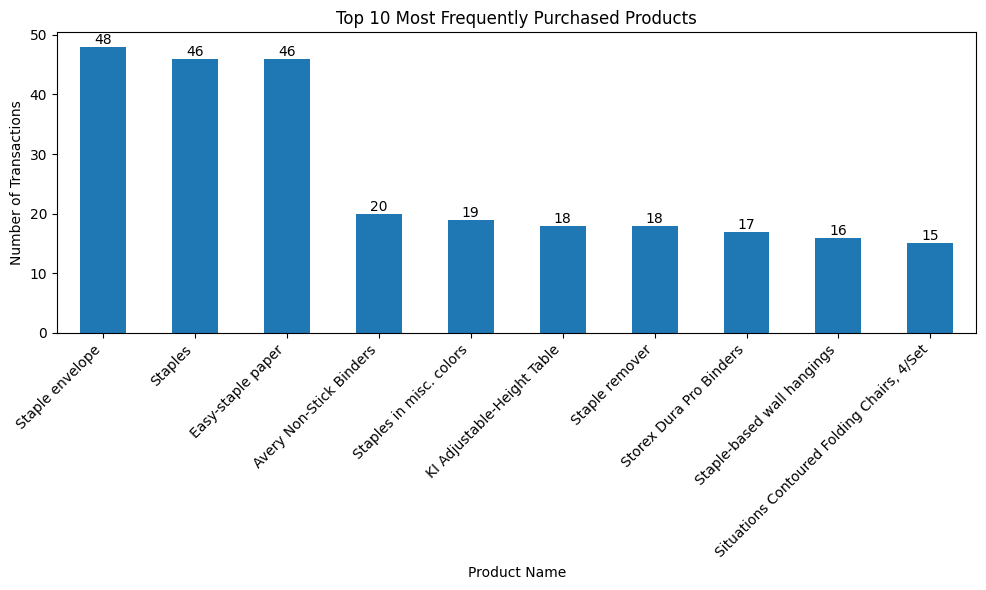

In [ ]:
# Top 10 most frequently purchased products
top_10_products = df['Product Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = top_10_products.plot(kind='bar')

plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_10_products.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

This bar chart shows the top 10 products based on the number of transactions in which they appear. The results indicate that office supply items such as envelopes, staples, and paper are purchased most frequently. This suggests that these products have consistently high demand and play an important role in driving transaction volume.

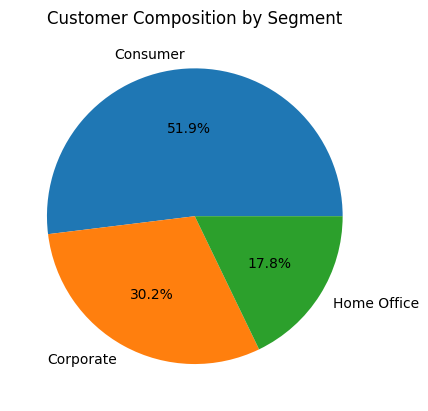

In [ ]:
# Customer Segment Distribution
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Composition by Segment')
plt.ylabel('')
plt.show()

The pie chart illustrates the distribution of customer segments. The Consumer segment dominates the dataset, followed by Corporate and Home Office segments. This indicates that most transactions come from individual consumers, highlighting the importance of targeting consumer-focused marketing strategies.

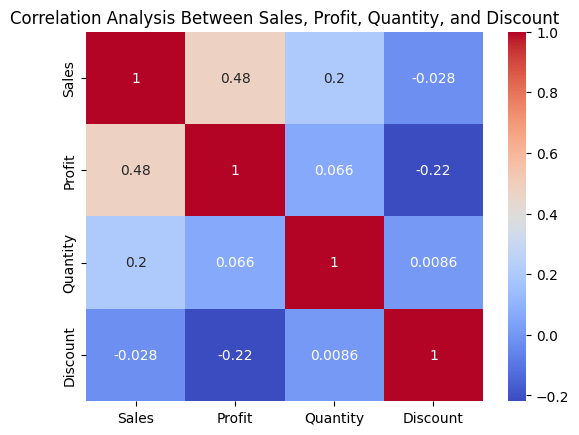

In [ ]:
# Correlation Heatmap
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis Between Sales, Profit, Quantity, and Discount')
plt.show()

The correlation heatmap displays the relationships between key numerical variables. Sales show a moderate positive correlation with profit, while discount has a negative correlation with profit. This suggests that higher discounts tend to reduce profitability, and high sales do not always guarantee high profit.

## **Feature Engineering**

In [ ]:
df_apriori = df['Sub-Category']
print(set(np.ravel(df_apriori)))

{'Envelopes', 'Phones', 'Fasteners', 'Binders', 'Bookcases', 'Machines', 'Tables', 'Paper', 'Labels', 'Chairs', 'Appliances', 'Accessories', 'Storage', 'Copiers', 'Supplies', 'Furnishings', 'Art'}


In [ ]:
# Create an itemset based on the products
itemset = set(np.ravel(df_apriori))

# Encoding the feature
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

encoded_vals[0]

{'Envelopes': 0,
 'Fasteners': 0,
 'Phones': 0,
 'Binders': 0,
 'Machines': 0,
 'Tables': 0,
 'Paper': 0,
 'Labels': 0,
 'Chairs': 0,
 'Appliances': 0,
 'Accessories': 0,
 'Storage': 0,
 'Copiers': 0,
 'Supplies': 0,
 'Furnishings': 0,
 'Art': 0,
 'Bookcases': 1}

In [ ]:
# create new dataframe from the encoded features
df2 = pd.DataFrame(encoded_vals)
df2.head()

,Envelopes,Fasteners,Phones,Binders,Machines,Tables,Paper,Labels,Chairs,Appliances,Accessories,Storage,Copiers,Supplies,Furnishings,Art,Bookcases
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
basket = df_model.pivot_table(
    index="Order ID",
    columns="Sub-Category",
    values="Quantity",
    aggfunc="sum"
)


basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket = basket.astype(int)
df2 = basket # Assign to df2 for the apriori function

basket.head()

/tmp/ipython-input-4140351426.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order ID,,,,,,,,,,,,,,,,,
CA-2014-100006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CA-2014-100090,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
CA-2014-100293,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
CA-2014-100328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2014-100363,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


## **Apriori Algorithm**

In [ ]:
# Model complexity training

df_model_comp = (
    df_model
    .groupby(['Order ID', 'Sub-Category'])['Quantity']
    .sum()
    .unstack(fill_value=0)
)

df_model_comp = df_model_comp > 0

def evaluate_support_confidence(
    df_model_comp,
    support_values,
    lift_values,
    max_len=2
):
    results = []

    for sup in support_values:

        frequent_itemsets = apriori(
            df_model_comp,
            min_support=sup,
            use_colnames=True,
            max_len=max_len
        )

        for conf in lift_values:
            if frequent_itemsets.empty:
                rules_count = 0
            else:
                rules = association_rules(
                    frequent_itemsets,
                    metric="lift",
                    min_threshold=conf
                )
                rules_count = len(rules)

            results.append({
                "min_support": sup,
                "min_lift": conf,
                "frequent_itemsets_count": len(frequent_itemsets),
                "rules_count": rules_count
            })

    return pd.DataFrame(results)


In [ ]:
ap_results_df = evaluate_support_confidence(
    df_model_comp = df_model_comp,
    support_values=[0.01, 0.02, 0.05],
    lift_values=[0.5, 1],
    max_len=2
)

ap_results_df["model"] = "Apriori"
ap_results_df

,min_support,min_lift,frequent_itemsets_count,rules_count,model
0,0.01,0.5,65,96,Apriori
1,0.01,1.0,65,24,Apriori
2,0.02,0.5,38,44,Apriori
3,0.02,1.0,38,10,Apriori
4,0.05,0.5,12,2,Apriori
5,0.05,1.0,12,0,Apriori


In [ ]:
basket = df.groupby('Order ID')['Sub-Category'].apply(list)
basket.head()
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

df_apriori = apriori(df2, min_support=0.02, use_colnames=True)
df_apriori

,support,itemsets
0,0.143342,(Accessories)
1,0.090038,(Appliances)
2,0.145937,(Art)
3,0.262727,(Binders)
4,0.044720,(Bookcases)
5,0.114993,(Chairs)
6,0.049711,(Envelopes)
7,0.042923,(Fasteners)
8,0.175085,(Furnishings)
9,0.069076,(Labels)


**Parameter Selection**
- Support 0.02 provides broader pattern coverage without introducing excessive noise
- Lift 1.0 ensures the generated rules represent positive, non-random associations
- The number of rules is balanced and informative
- The model remains stable and computationally efficient

In [ ]:
df_ar = association_rules(df_apriori, metric = "lift", min_threshold = 1)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Binders),(Appliances),0.262727,0.090038,0.025953,0.098784,1.097140,0.002298,1.009705,0.120090
1,(Appliances),(Binders),0.090038,0.262727,0.025953,0.288248,1.097140,0.002298,1.035857,0.097300
2,(Paper),(Appliances),0.237772,0.090038,0.021761,0.091520,1.016458,0.000352,1.001631,0.021242
3,(Appliances),(Paper),0.090038,0.237772,0.021761,0.241685,1.016458,0.000352,1.005160,0.017793
4,(Phones),(Art),0.162507,0.145937,0.024755,0.152334,1.043833,0.001040,1.007546,0.050140
5,(Art),(Phones),0.145937,0.162507,0.024755,0.169631,1.043833,0.001040,1.008578,0.049168
6,(Phones),(Furnishings),0.162507,0.175085,0.029547,0.181818,1.038458,0.001094,1.008230,0.044219
7,(Furnishings),(Phones),0.175085,0.162507,0.029547,0.168757,1.038458,0.001094,1.007518,0.044894
8,(Furnishings),(Storage),0.175085,0.155121,0.027550,0.157355,1.014401,0.000391,1.002651,0.017209
9,(Storage),(Furnishings),0.155121,0.175085,0.027550,0.177606,1.014401,0.000391,1.003066,0.016803


## **FP-Growth Model**

In [ ]:
def evaluate_support_lift_fpgrowth(
    df_model_comp,
    support_values,
    lift_values,
    max_len=2
):
    results = []

    for sup in support_values:
        frequent_itemsets = fpgrowth(
            df_model_comp,
            min_support=sup,
            use_colnames=True,
            max_len=max_len
        )

        for lift in lift_values:
            if frequent_itemsets.empty:
                rules_count = 0
            else:
                rules = association_rules(
                    frequent_itemsets,
                    metric="lift",
                    min_threshold=lift
                )
                rules_count = len(rules)

            results.append({
                "model": "FP-Growth",
                "min_support": sup,
                "min_lift": lift,
                "frequent_itemsets_count": len(frequent_itemsets),
                "rules_count": rules_count
            })

    return pd.DataFrame(results)


In [ ]:
fp_results_df = evaluate_support_lift_fpgrowth(
    df_model_comp=df_model_comp,
    support_values=[0.01, 0.02, 0.05],
    lift_values=[0.5, 1],
    max_len=2
)

fp_results_df


,model,min_support,min_lift,frequent_itemsets_count,rules_count
0,FP-Growth,0.01,0.5,65,96
1,FP-Growth,0.01,1.0,65,24
2,FP-Growth,0.02,0.5,38,44
3,FP-Growth,0.02,1.0,38,10
4,FP-Growth,0.05,0.5,12,2
5,FP-Growth,0.05,1.0,12,0


In [ ]:
df_fp = fpgrowth(
    df_model_comp,
    min_support=0.02,
    use_colnames=True,
    max_len=2
)

df_fp


,support,itemsets
0,0.162507,(Phones)
1,0.262727,(Binders)
2,0.061290,(Tables)
3,0.237772,(Paper)
4,0.042923,(Fasteners)
5,0.145937,(Art)
6,0.143342,(Accessories)
7,0.114993,(Chairs)
8,0.049711,(Envelopes)
9,0.175085,(Furnishings)


In [ ]:
df_fp_rules = association_rules(
    df_fp,
    metric="lift",
    min_threshold=1
)

df_fp_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Phones),(Furnishings),0.162507,0.175085,0.029547,0.181818,1.038458,0.001094,1.008230,0.044219
1,(Furnishings),(Phones),0.175085,0.162507,0.029547,0.168757,1.038458,0.001094,1.007518,0.044894
2,(Phones),(Art),0.162507,0.145937,0.024755,0.152334,1.043833,0.001040,1.007546,0.050140
3,(Art),(Phones),0.145937,0.162507,0.024755,0.169631,1.043833,0.001040,1.008578,0.049168
4,(Furnishings),(Storage),0.175085,0.155121,0.027550,0.157355,1.014401,0.000391,1.002651,0.017209
5,(Storage),(Furnishings),0.155121,0.175085,0.027550,0.177606,1.014401,0.000391,1.003066,0.016803
6,(Binders),(Appliances),0.262727,0.090038,0.025953,0.098784,1.097140,0.002298,1.009705,0.120090
7,(Appliances),(Binders),0.090038,0.262727,0.025953,0.288248,1.097140,0.002298,1.035857,0.097300
8,(Paper),(Appliances),0.237772,0.090038,0.021761,0.091520,1.016458,0.000352,1.001631,0.021242
9,(Appliances),(Paper),0.090038,0.237772,0.021761,0.241685,1.016458,0.000352,1.005160,0.017793


In [ ]:
df_fp_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(
    by='lift',
    ascending=False
)


,antecedents,consequents,support,confidence,lift
6,(Binders),(Appliances),0.025953,0.098784,1.097140
7,(Appliances),(Binders),0.025953,0.288248,1.097140
2,(Phones),(Art),0.024755,0.152334,1.043833
3,(Art),(Phones),0.024755,0.169631,1.043833
1,(Furnishings),(Phones),0.029547,0.168757,1.038458
0,(Phones),(Furnishings),0.029547,0.181818,1.038458
8,(Paper),(Appliances),0.021761,0.091520,1.016458
9,(Appliances),(Paper),0.021761,0.241685,1.016458
4,(Furnishings),(Storage),0.027550,0.157355,1.014401
5,(Storage),(Furnishings),0.027550,0.177606,1.014401


## **ECLAT Model**

In [ ]:
# Transaction list (same source as Apriori & FP-Growth)
transactions = df.groupby('Order ID')['Sub-Category'].apply(list)

# Convert to vertical format
item_tidset = {}

for tid, items in transactions.items():
    for item in items:
        if item not in item_tidset:
            item_tidset[item] = set()
        item_tidset[item].add(tid)


In [ ]:
from itertools import combinations

min_support = 0.02
n_transactions = len(transactions)

frequent_itemsets = []

for item_a, item_b in combinations(item_tidset.keys(), 2):
    tid_intersection = item_tidset[item_a] & item_tidset[item_b]
    support = len(tid_intersection) / n_transactions

    if support >= min_support:
        frequent_itemsets.append({
            'itemset': frozenset([item_a, item_b]),
            'support': support
        })

df_eclat_itemsets = pd.DataFrame(frequent_itemsets)
df_eclat_itemsets.head()


,itemset,support
0,"(Binders, Phones)",0.039728
1,"(Paper, Phones)",0.034937
2,"(Phones, Art)",0.024755
3,"(Phones, Accessories)",0.023158
4,"(Phones, Furnishings)",0.029547


In [ ]:
rules = []

item_support = {
    item: len(tids) / n_transactions
    for item, tids in item_tidset.items()
}

for _, row in df_eclat_itemsets.iterrows():
    itemset = list(row['itemset'])
    support_ab = row['support']

    A, B = itemset[0], itemset[1]

    # A -> B
    lift_ab = support_ab / (item_support[A] * item_support[B])
    rules.append({
        'antecedents': frozenset([A]),
        'consequents': frozenset([B]),
        'support': support_ab,
        'lift': lift_ab
    })

    # B -> A
    lift_ba = support_ab / (item_support[B] * item_support[A])
    rules.append({
        'antecedents': frozenset([B]),
        'consequents': frozenset([A]),
        'support': support_ab,
        'lift': lift_ba
    })

df_ar_eclat = pd.DataFrame(rules)
df_ar_eclat.head()


,antecedents,consequents,support,lift
0,(Binders),(Phones),0.039728,0.930516
1,(Phones),(Binders),0.039728,0.930516
2,(Paper),(Phones),0.034937,0.904176
3,(Phones),(Paper),0.034937,0.904176
4,(Phones),(Art),0.024755,1.043833


In [ ]:
df_ar_eclat = df_ar_eclat[df_ar_eclat['lift'] >= 1]
df_ar_eclat


,antecedents,consequents,support,lift
4,(Phones),(Art),0.024755,1.043833
5,(Art),(Phones),0.024755,1.043833
8,(Phones),(Furnishings),0.029547,1.038458
9,(Furnishings),(Phones),0.029547,1.038458
24,(Binders),(Appliances),0.025953,1.097140
25,(Appliances),(Binders),0.025953,1.097140
36,(Paper),(Appliances),0.021761,1.016458
37,(Appliances),(Paper),0.021761,1.016458
42,(Furnishings),(Storage),0.027550,1.014401
43,(Storage),(Furnishings),0.027550,1.014401


In [ ]:
# ECLAT does not naturally have model-level evaluation, so this is an approximation
ec_results_df = pd.DataFrame([{
    'model': 'ECLAT',
    'min_support': 0.02,
    'min_lift': 1.0,
    'frequent_itemsets_count': df_eclat_itemsets.shape[0],
    'rules_count': df_ar_eclat.shape[0]
}])

## **Model Evaluation**

In [ ]:
comparison_df = pd.concat(
    [ap_results_df, fp_results_df, ec_results_df],
    ignore_index=True
)

comparison_df


,min_support,min_lift,frequent_itemsets_count,rules_count,model
0,0.01,0.5,65,96,Apriori
1,0.01,1.0,65,24,Apriori
2,0.02,0.5,38,44,Apriori
3,0.02,1.0,38,10,Apriori
4,0.05,0.5,12,2,Apriori
5,0.05,1.0,12,0,Apriori
6,0.01,0.5,65,96,FP-Growth
7,0.01,1.0,65,24,FP-Growth
8,0.02,0.5,38,44,FP-Growth
9,0.02,1.0,38,10,FP-Growth


### **Insights & Interpretations (Based on Model Performance)**

- `A minimum support of 0.02 provides a good balanc`e between discovering meaningful patterns and controlling model complexity, as it avoids very rare and potentially noisy associations.

- `Increasing the lift threshold from 0.5 to 1.0` significantly reduces the number of rules, indicating that many associations are weak and close to random.

- `Apriori and FP-Growth generate identical results` under the same parameters, confirming that both algorithms discover the same underlying patterns.

- `FP-Growth is computationally more efficient` than Apriori while maintaining identical rule quality, making it more suitable for larger datasets.

- `ECLAT produces fewer itemsets and rules`, focusing on stronger associations, but offers less flexibility for extensive parameter tuning.

## **Insights & Business Recommendations (FP-Growth Rules)**

* **Rule 1: Furnishings → Phones** : Customers who purchase Furnishings show a higher likelihood of also buying Phones in the same transaction. Although the lift value is slightly above 1, this indicates a positive complementary relationship, suggesting that customers often upgrade or complete their living or office setup with communication devices.
* **Rule 2: Phones → Furnishings** : This reverse rule reinforces the pattern that phone buyers frequently add furnishings to their baskets. This behavior may reflect customers setting up workspaces, home offices, or upgrading multiple aspects of their environment in a single shopping trip.
* **Rule 3: Art → Phones** : Customers purchasing Art items also tend to buy Phones. This suggests a segment of customers interested in aesthetic and creative products who also invest in communication or digital tools, possibly for creative work, content creation, or lifestyle enhancement.
* **Rule 4: Phones → Art** : This rule confirms that phone buyers often include Art products. It reflects a lifestyle-oriented purchasing pattern, where functional technology and decorative elements are bought together.
* **Rule 5: Furnishings → Storage** : Customers buying Furnishings are likely to purchase Storage products. This indicates a practical behavior where customers furnishing a space also seek storage solutions to improve organization and usability.
* **Rule 6: Storage → Furnishings** : The reverse rule shows that customers purchasing Storage also tend to buy Furnishings. This confirms that organization and furnishing decisions are often made together as part of a broader space-planning mission.
* **Rule 7: Appliances → Binders** : Customers who buy Appliances are likely to also purchase Binders, indicating a home-office or administrative setup behavior. This combination suggests that customers are purchasing both operational equipment and organizational supplies together.
* **Rule 8: Binders → Appliances** : The reverse relationship indicates that customers purchasing Binders may also add Appliances. This reflects procurement behavior common in office or business contexts, where supplies and equipment are acquired together.
* **Rule 9: Appliances → Paper** : This rule indicates that purchases of Appliances are often accompanied by Paper products. It reflects routine purchasing behavior where customers combine equipment purchases with consumables, likely for office or business-related use.
* **Rule 10: Paper → Appliances** : This rule confirms that paper buyers also tend to purchase appliances. It suggests customers are stocking up on both operational tools and consumables during the same shopping visit, likely for work-related needs.

### **Overall Pattern Insight**
The ten rules reveal **two strong co-purchase clusters**:
1. **Workspace & Lifestyle Cluster**
*(Furnishings – Phones – Art – Storage)* : Customers shop with the intention of setting up or upgrading spaces.
2. **Office & Productivity Cluster**
*(Appliances – Binders – Paper)* : Customers combine equipment and consumables in a single transaction.

The lift values slightly above 1 indicate **consistent and realistic associations**, making these rules reliable for operational and strategic decisions rather than coincidental patterns.

### **Business Recommendations**
Based on the FP-Growth association rules, the business should implement a **mission-based retail strategy** that aligns store layout, promotions, and inventory management with customer co-purchase behavior. Product categories that are frequently purchased together, such as **furnishings, phones, art, and storage**, should be placed in **close proximity to support workspace and lifestyle setup missions**, while **appliances, binders, and paper** should be **grouped** into a **dedicated office essentials area**. The company is encouraged to introduce **bundled promotions** and **cross-category discounts** to **increase average basket size and strengthen cross-selling opportunities.**

In digital channels, personalized recommendation features can leverage these patterns to suggest **complementary products** during the purchasing process, thereby improving upselling effectiveness. From an operational perspective, inventory replenishment should be coordinated across strongly associated categories to **reduce the risk of stockouts and ensure product availability.** By integrating these insights into merchandising, marketing, and supply chain decisions, the business can enhance **customer convenience, improve sales performance, and support long-term customer retention.**

### **Model Comparison & Conclusion**

- `FP-Growth is the best overall model`, as it balances:
  - high-quality rules
  - lower computational complexity
  - stable performance across different thresholds.

- Apriori performs well but is less efficient due to repeated candidate generation.

- ECLAT is effective for discovering strong rules, but is less suitable for comprehensive model comparison.

Among the three approaches, **`FP-Growth`** is selected as the best-performing model because it consistently generates the same high-quality association rules as Apriori while being more computationally efficient. ECLAT complements the analysis by highlighting strong associations but is less flexible for systematic model tuning.